## Data Loading

In [9]:
# Importing necessary libraries
import json
import pandas as pd
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from IPython.display import display, HTML
import time
import concurrent.futures
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from tqdm.notebook import tqdm
!pip install ultralytics
from ultralytics import YOLO
import ast

#### Collab import

In [10]:
data = pd.read_csv('DEFINITIVOO.csv')
history = data[data['genre'] == 'history']
romance = data[data['genre'] == 'romance']

/var/folders/_j/f96rrhbn7sn9rhplqnfbww180000gn/T/ipykernel_71388/170919136.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('DEFINITIVOO.csv')


In [11]:
# Display basic information about the dataset
data_info = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Missing Values": data.isnull().sum().to_dict(),
    "Data Types": data.dtypes.to_dict(),
    "First Few Rows": data.head().to_dict()
}

data_info

{'Shape': (119049, 49),
 'Columns': ['book_id',
  'ratings_count',
  'authors',
  'language_code',
  'image_url',
  'author_id',
  'name_author',
  'ratings_count_authors',
  'first_name',
  'gender_author',
  'gender_probability',
  'genre',
  'brightness',
  'color_count',
  'colorfulness',
  'contrast',
  'edge_density',
  'num_objects',
  'class_counts',
  'is_person',
  'is_bird',
  'is_clock',
  'is_cat',
  'is_tv',
  'saturation',
  'Unnamed: 0',
  'dominant_colors',
  'color_harmony',
  'is_dog',
  'is_cup',
  'is_tie',
  'special_feature',
  'log_ratings_count',
  'brightness_x_special_feature',
  'saturation_x_special_feature',
  'color_count_x_special_feature',
  'colorfulness_x_special_feature',
  'contrast_x_special_feature',
  'edge_density_x_special_feature',
  'num_objects_x_special_feature',
  'is_person_x_special_feature',
  'is_bird_x_special_feature',
  'is_clock_x_special_feature',
  'is_dog_x_special_feature',
  'is_cup_x_special_feature',
  'is_tie_x_special_feat

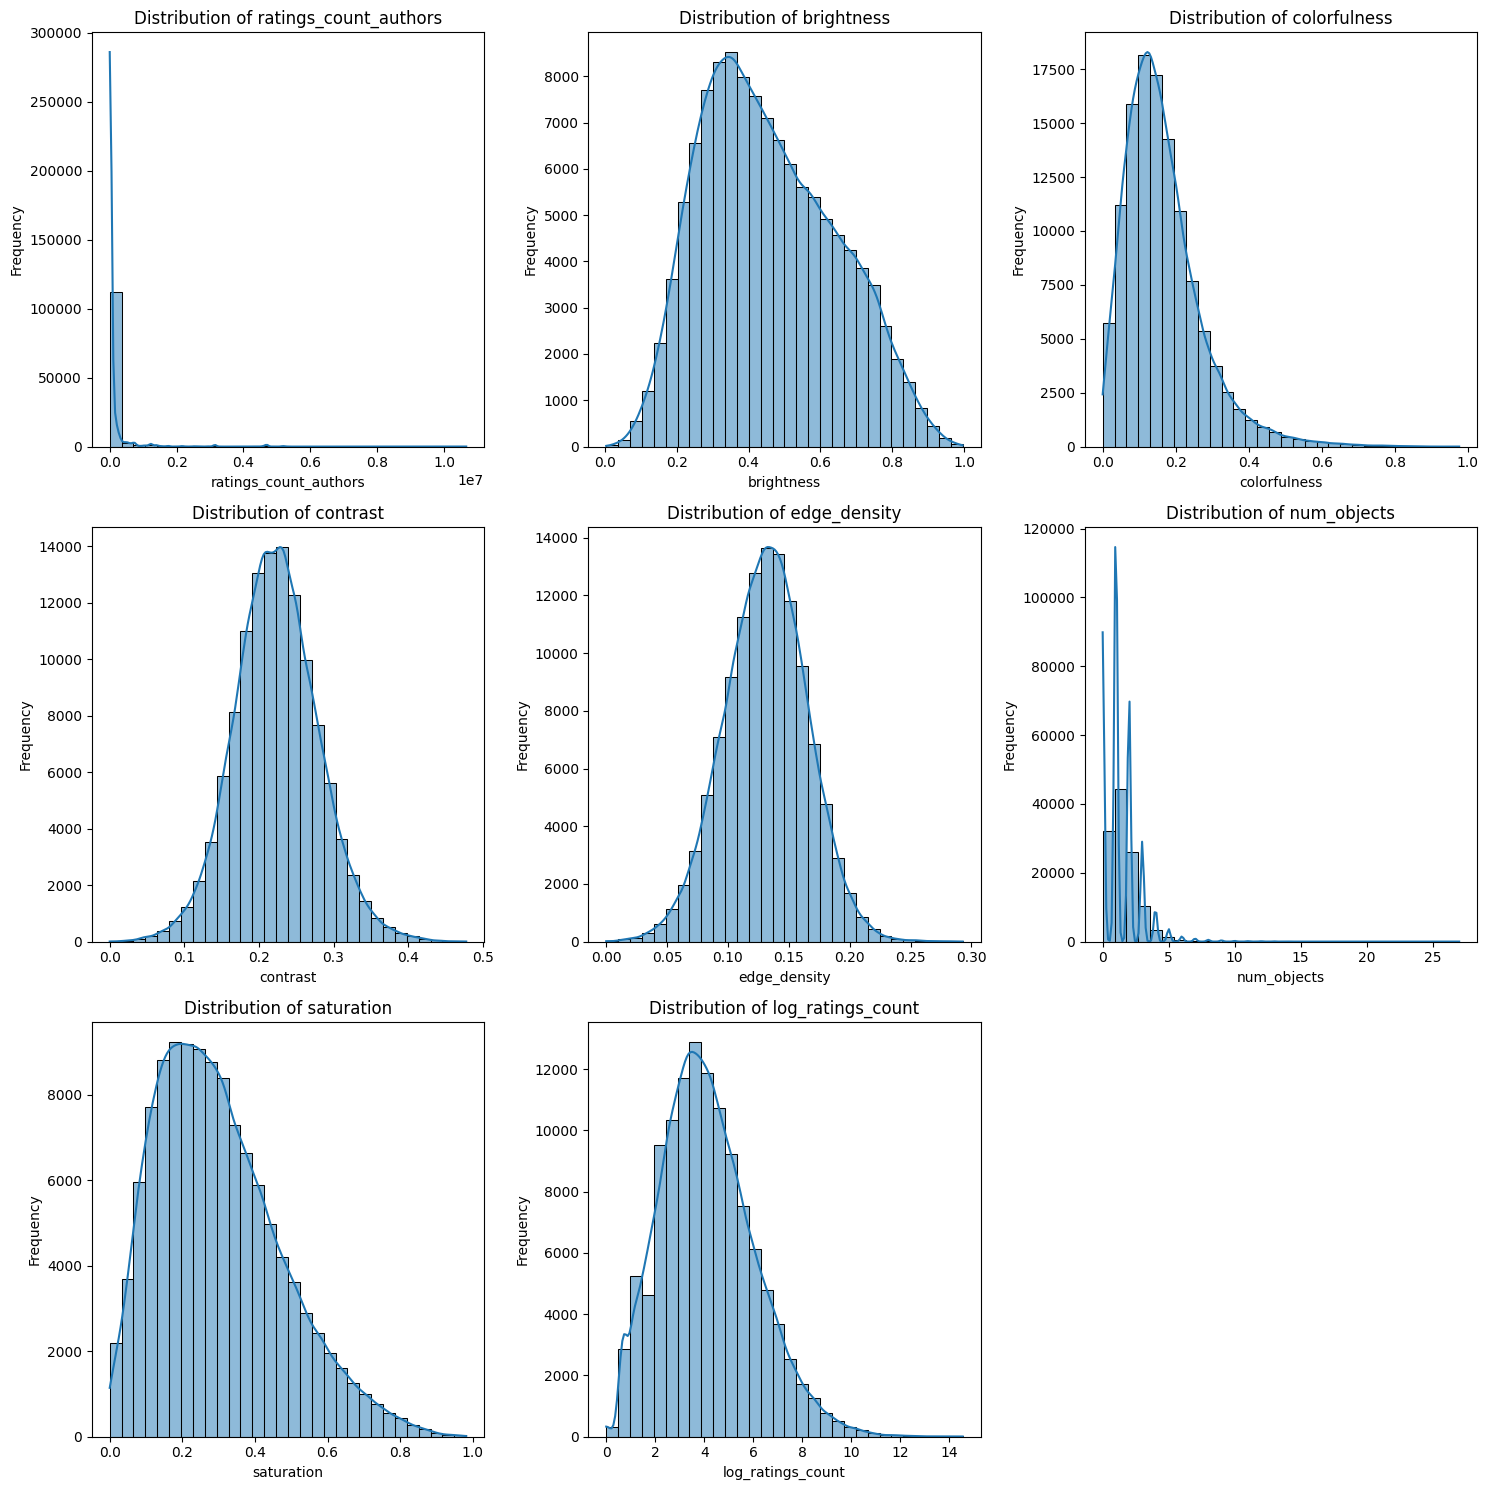

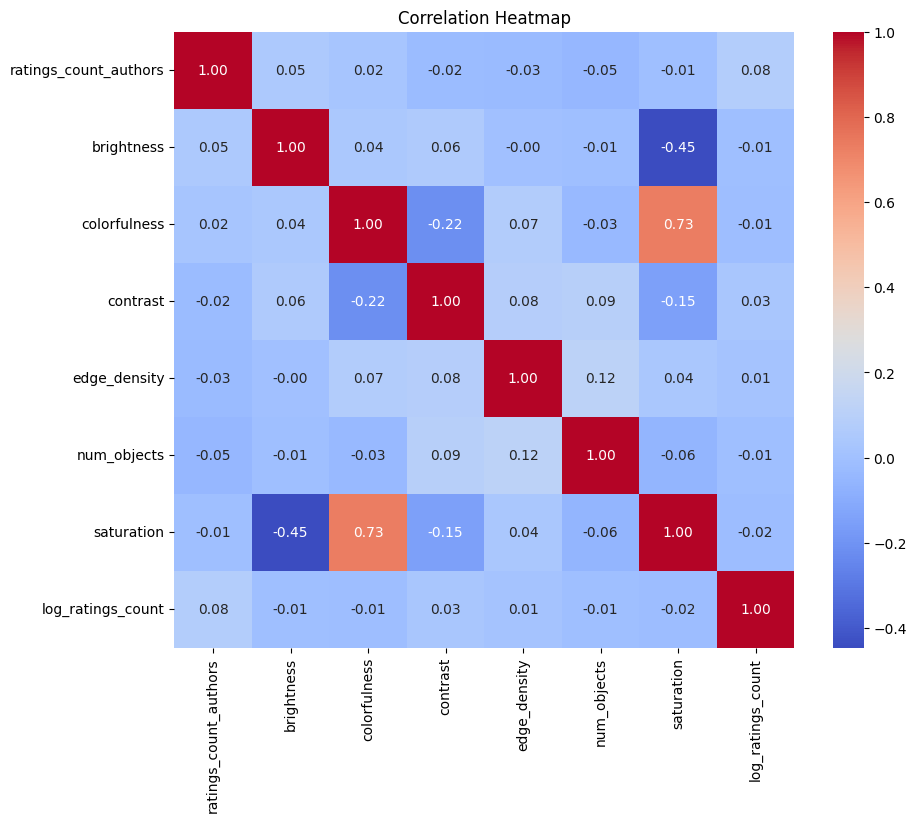

,book_id,ratings_count,author_id,ratings_count_authors,gender_probability,brightness,color_count,colorfulness,contrast,edge_density,...,num_objects_x_special_feature,is_person_x_special_feature,is_bird_x_special_feature,is_clock_x_special_feature,is_dog_x_special_feature,is_cup_x_special_feature,is_tie_x_special_feature,is_cat_x_special_feature,is_tv_x_special_feature,genre_binary
count,1.190490e+05,1.190490e+05,1.190490e+05,1.190490e+05,119049.000000,119049.000000,119049.000000,119049.000000,119049.000000,119049.000000,...,119049.000000,119049.000000,119049.000000,119049.000000,119049.000000,119049.000000,119049.000000,119049.000000,119049.000000,119049.000000
mean,1.878293e+07,8.124341e+02,3.862551e+06,1.120969e+05,99.551664,0.455639,2384.387639,0.165314,0.223352,0.131073,...,0.230829,0.098514,0.002932,0.003755,0.001604,0.000563,0.001403,0.001898,0.004813,0.700829
std,9.367463e+06,1.437591e+04,3.985681e+06,4.765230e+05,0.683548,0.184882,228.063083,0.106168,0.056269,0.034208,...,0.763015,0.298010,0.054065,0.061161,0.040023,0.023717,0.037428,0.043529,0.069210,0.457897
min,5.700000e+01,0.000000e+00,7.000000e+00,0.000000e+00,95.000994,0.003921,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.318424e+07,1.500000e+01,1.482570e+05,8.070000e+02,99.584838,0.311323,2387.000000,0.091823,0.186332,0.108319,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.861992e+07,5.100000e+01,3.132972e+06,5.319000e+03,99.700448,0.432841,2480.000000,0.145899,0.222258,0.131716,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.550844e+07,2.050000e+02,6.551081e+06,3.504600e+04,99.847128,0.591275,2499.000000,0.214130,0.258988,0.154098,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.649775e+07,2.078406e+06,1.730744e+07,1.066672e+07,100.000000,0.996030,2500.000000,0.976295,0.477876,0.292789,...,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistical summary
stats_summary = data.describe()

# Visualize distributions for selected numerical columns
numerical_columns = [
    'ratings_count_authors', 'brightness', 'colorfulness',
    'contrast', 'edge_density', 'num_objects', 'saturation', 'log_ratings_count'
]

# Define number of plots per row
plots_per_row = 3
n_cols = plots_per_row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten axes array for easy iteration

for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Hide any unused subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Display basic statistical summary
stats_summary


In [13]:
# Count for 'history' and 'male'/'female'
history_male_count = data[(data['genre'] == 'history') & (data['gender_author'] == 'male')].shape[0]
history_female_count = data[(data['genre'] == 'history') & (data['gender_author'] == 'female')].shape[0]

# Count for 'romance' and 'male'/'female'
romance_male_count = data[(data['genre'] == 'romance') & (data['gender_author'] == 'male')].shape[0]
romance_female_count = data[(data['genre'] == 'romance') & (data['gender_author'] == 'female')].shape[0]

# Display results
counts = {
    "Genre": ["History", "History", "Romance", "Romance"],
    "Gender Author": ["Male", "Female", "Male", "Female"],
    "Count": [history_male_count, history_female_count, romance_male_count, romance_female_count],
}

import pandas as pd
counts_df = pd.DataFrame(counts)
display(counts_df)


,Genre,Gender Author,Count
0,History,Male,20372
1,History,Female,15244
2,Romance,Male,5540
3,Romance,Female,77893


In [14]:
import math

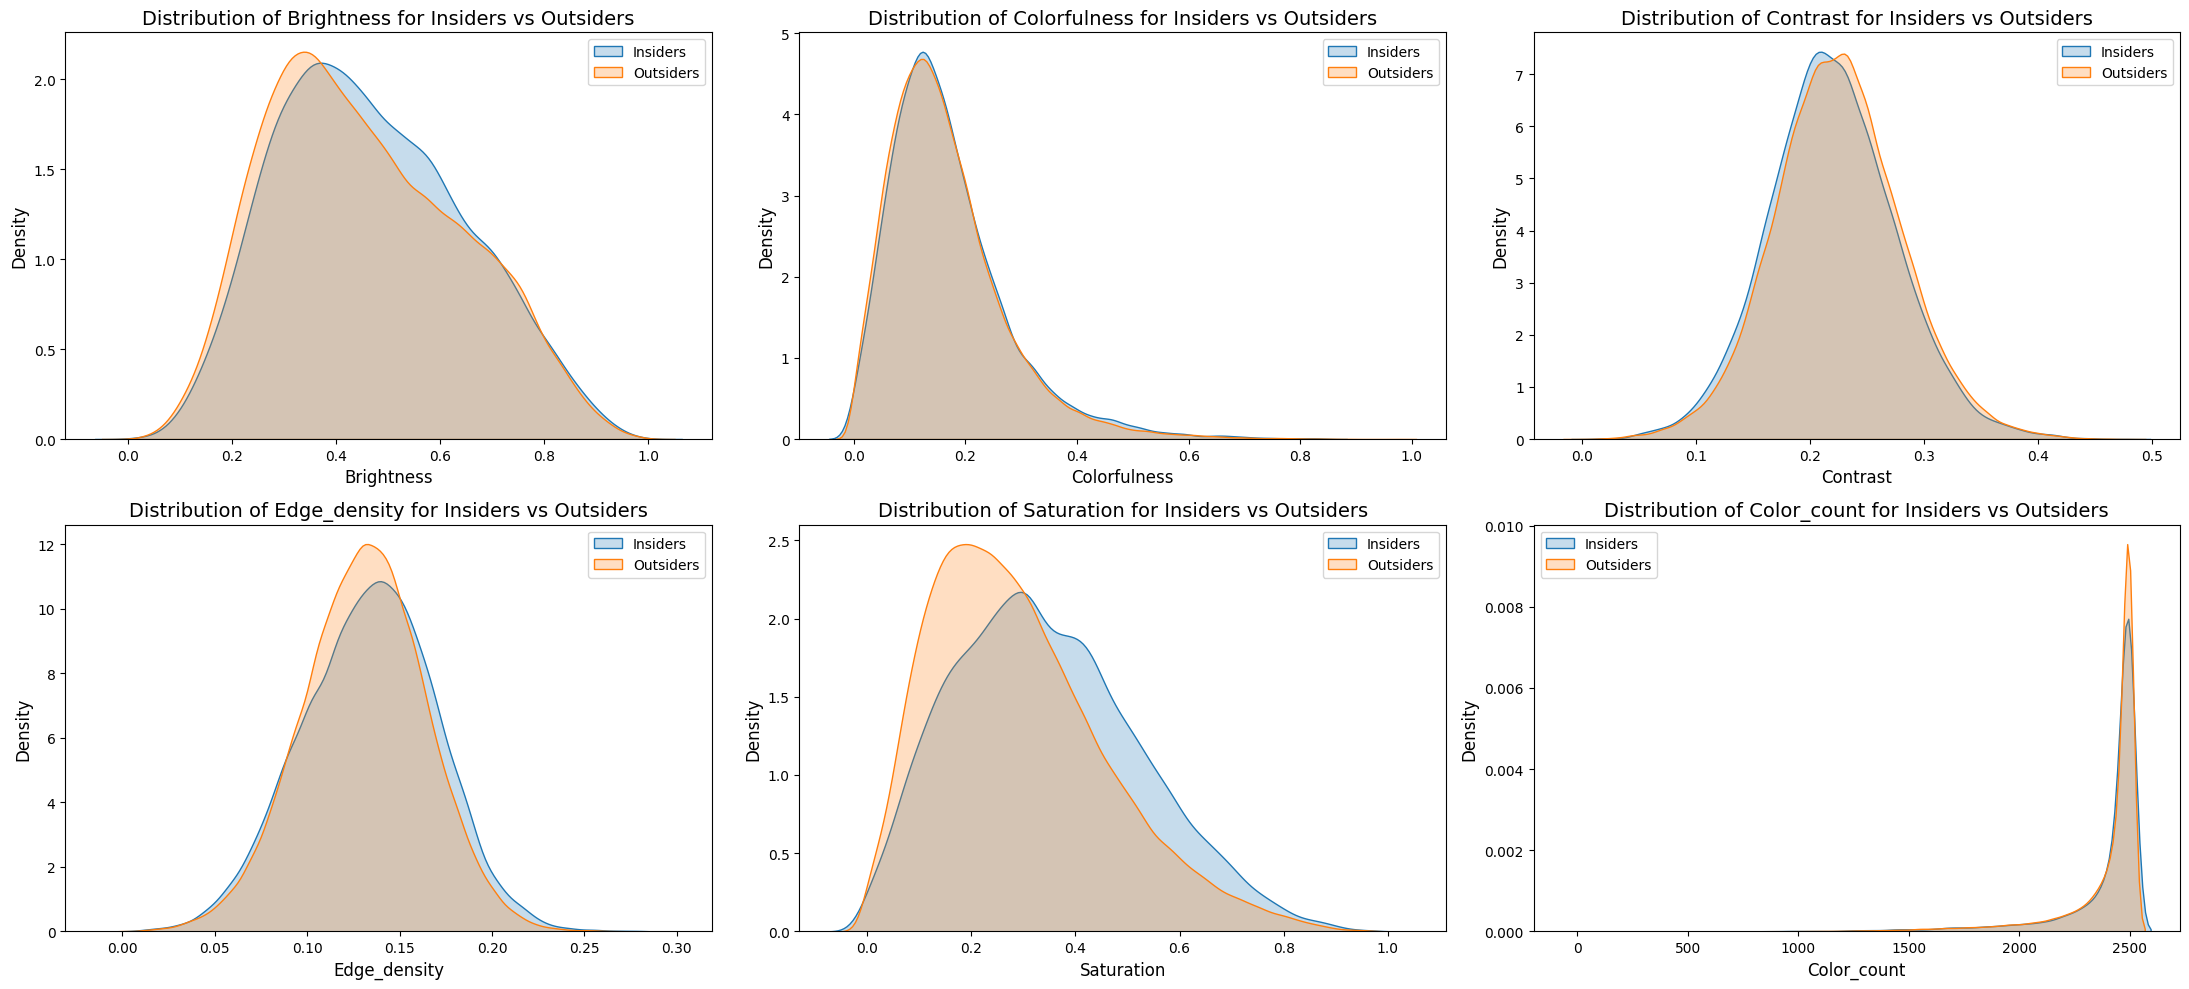

In [33]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data based on insider/outsider status
insiders = data[data['special_feature'] == 1]
outsiders = data[data['special_feature'] == 0]

# List of visual features to compare
visual_features = ['brightness', 'colorfulness', 'contrast', 'edge_density', 
                   'saturation', 'color_count']

# Plot distributions for visual features (2 plots per row)
n_features = len(visual_features)
n_cols = 3  # Number of plots per row
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, n_rows * 5))

for i, feature in enumerate(visual_features):
    row, col = divmod(i, n_cols)
    ax = axes[row, col] if n_rows > 1 else axes[col]
    sns.kdeplot(insiders[feature], label='Insiders', fill=True, ax=ax)
    sns.kdeplot(outsiders[feature], label='Outsiders', fill=True, ax=ax)
    ax.set_title(f"Distribution of {feature.capitalize()} for Insiders vs Outsiders", fontsize=14)
    ax.set_xlabel(feature.capitalize(), fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.legend()

# Hide empty subplots if any
if n_rows > 1:
    for i in range(len(visual_features), n_rows * n_cols):
        fig.delaxes(axes[divmod(i, n_cols)])
else:
    for i in range(len(visual_features), n_cols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


##### Splitting samples

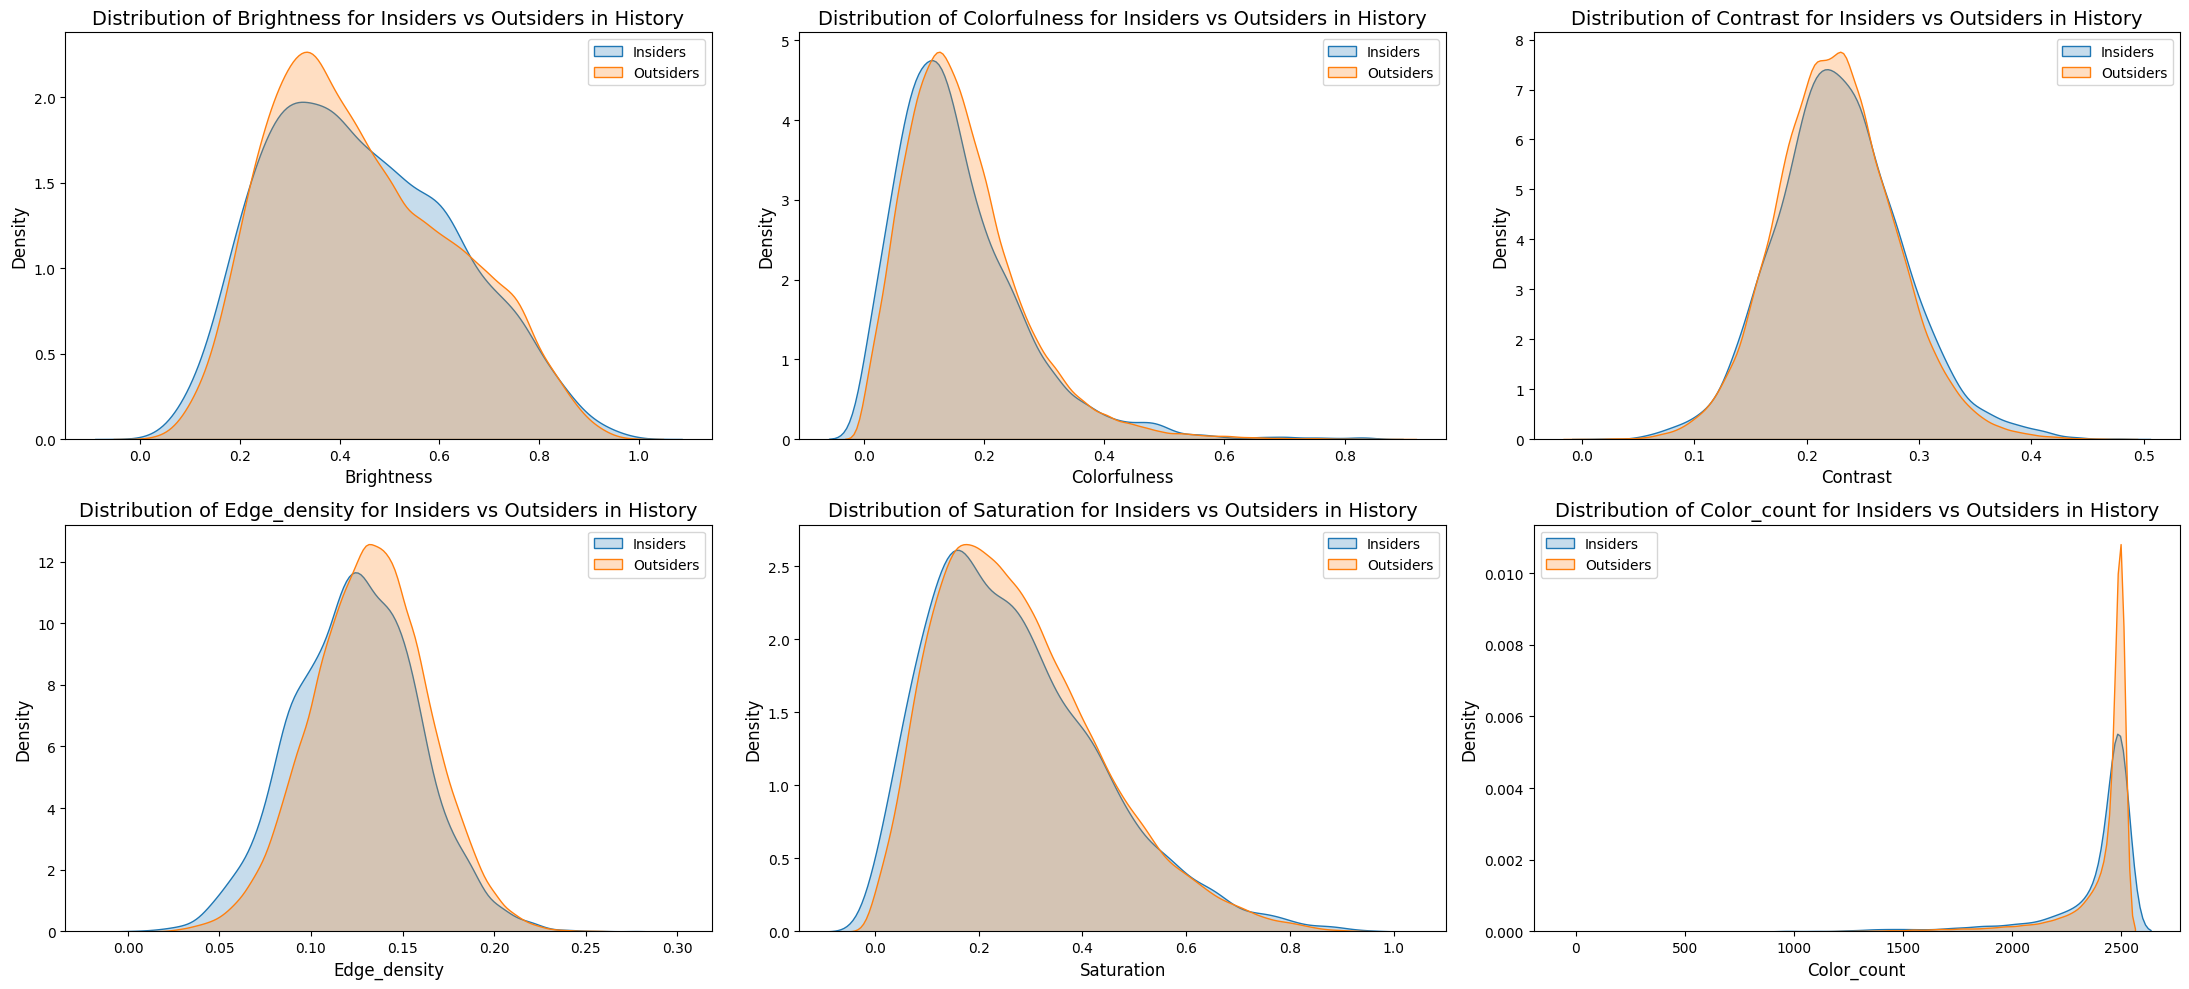

In [31]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data based on insider/outsider status
insiders = romance[romance['special_feature'] == 1]
outsiders = romance[romance['special_feature'] == 0]

# List of visual features to compare
visual_features = ['brightness', 'colorfulness', 'contrast', 'edge_density', 
                   'saturation', 'color_count']

# Plot distributions for visual features (3 plots per row)
n_features = len(visual_features)
n_cols = 3  # Number of plots per row
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, n_rows * 5))
axes = axes.flatten()  # Flatten axes array for easier iteration

for i, feature in enumerate(visual_features):
    sns.kdeplot(insiders[feature], label='Insiders', fill=True, ax=axes[i])
    sns.kdeplot(outsiders[feature], label='Outsiders', fill=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature.capitalize()} for Insiders vs Outsiders in History", fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel("Density", fontsize=12)
    axes[i].legend()

# Hide any unused subplots
for j in range(len(visual_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


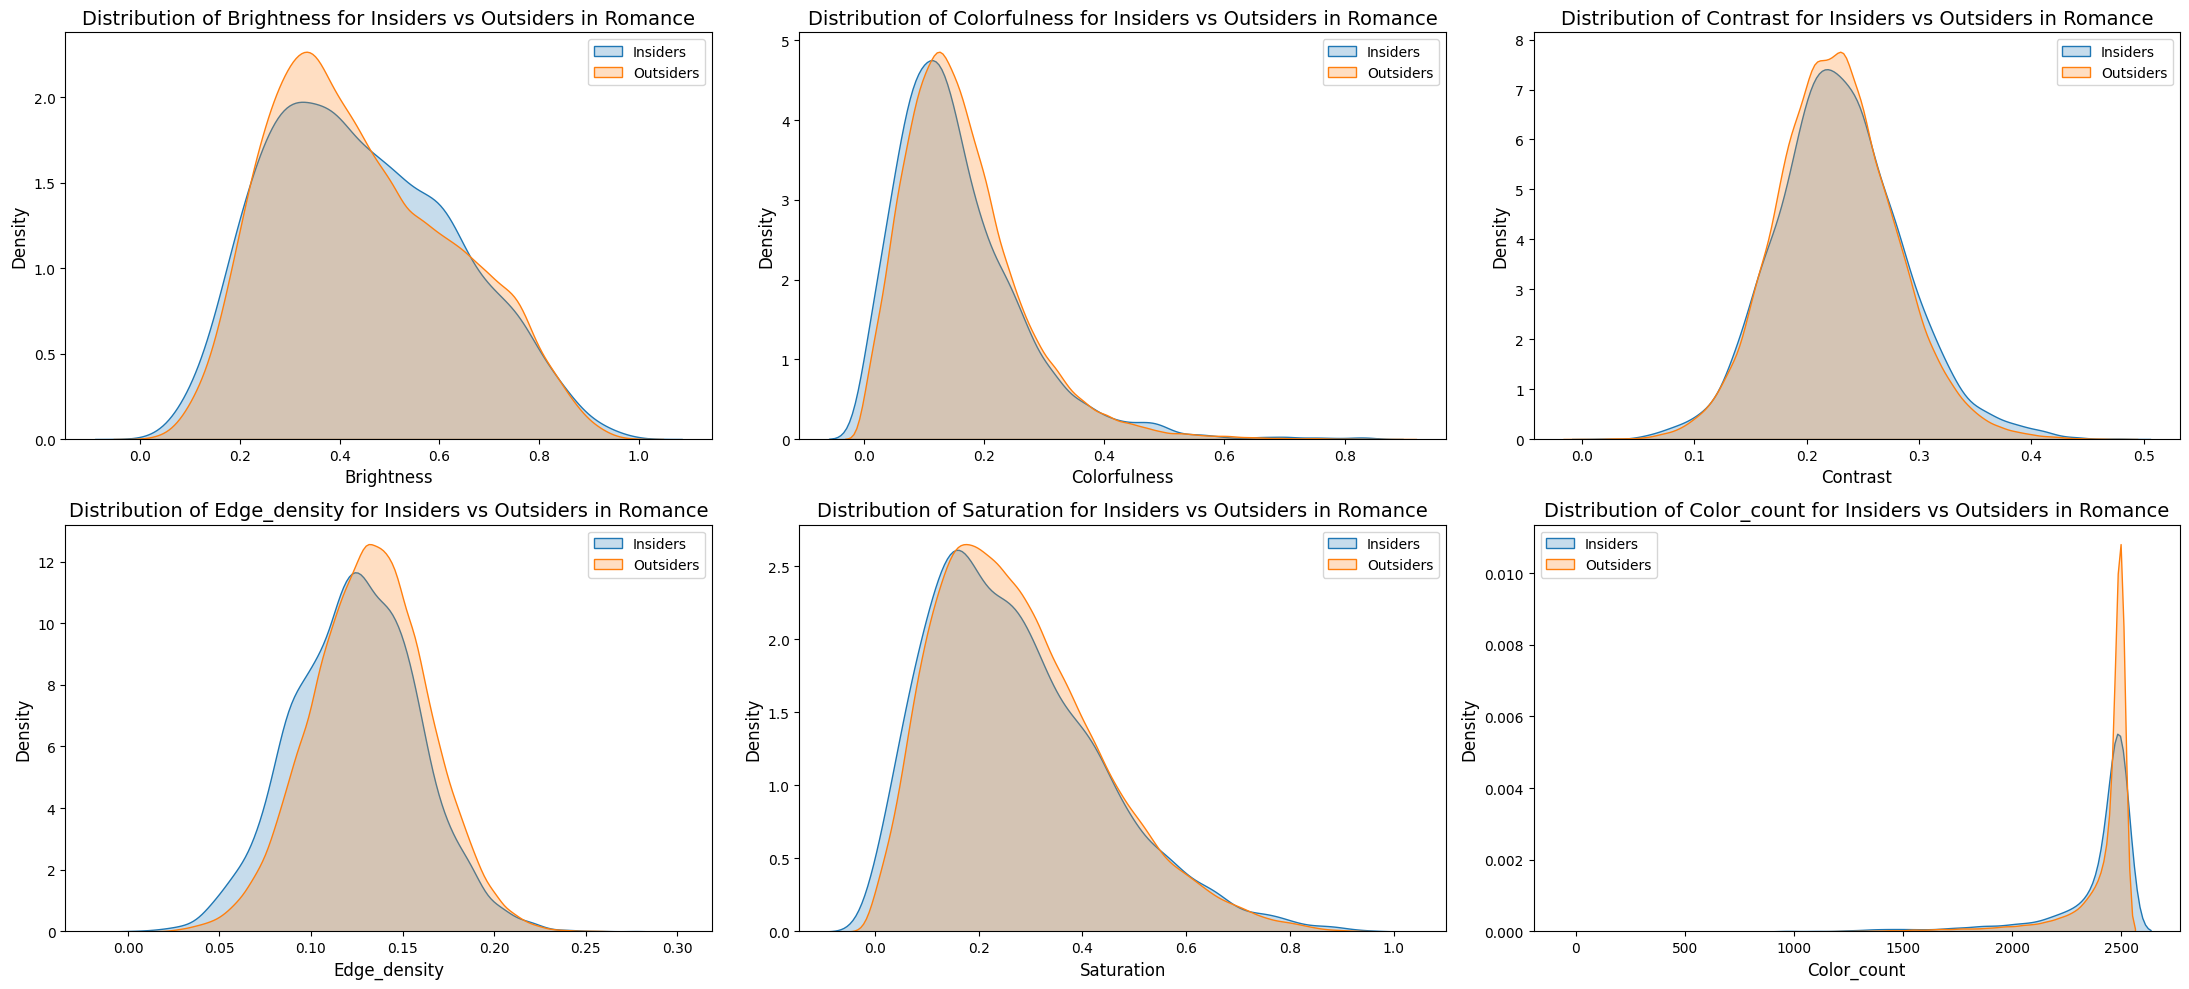

In [32]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data based on insider/outsider status
insiders = romance[romance['special_feature'] == 1]
outsiders = romance[romance['special_feature'] == 0]

# List of visual features to compare
visual_features = ['brightness', 'colorfulness', 'contrast', 'edge_density', 
                   'saturation', 'color_count']

# Plot distributions for visual features (3 plots per row)
n_features = len(visual_features)
n_cols = 3  # Number of plots per row
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, n_rows * 5))
axes = axes.flatten()  # Flatten axes array for easier iteration

for i, feature in enumerate(visual_features):
    sns.kdeplot(insiders[feature], label='Insiders', fill=True, ax=axes[i])
    sns.kdeplot(outsiders[feature], label='Outsiders', fill=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature.capitalize()} for Insiders vs Outsiders in Romance", fontsize=14)
    axes[i].set_xlabel(feature.capitalize(), fontsize=12)
    axes[i].set_ylabel("Density", fontsize=12)
    axes[i].legend()

# Hide any unused subplots
for j in range(len(visual_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


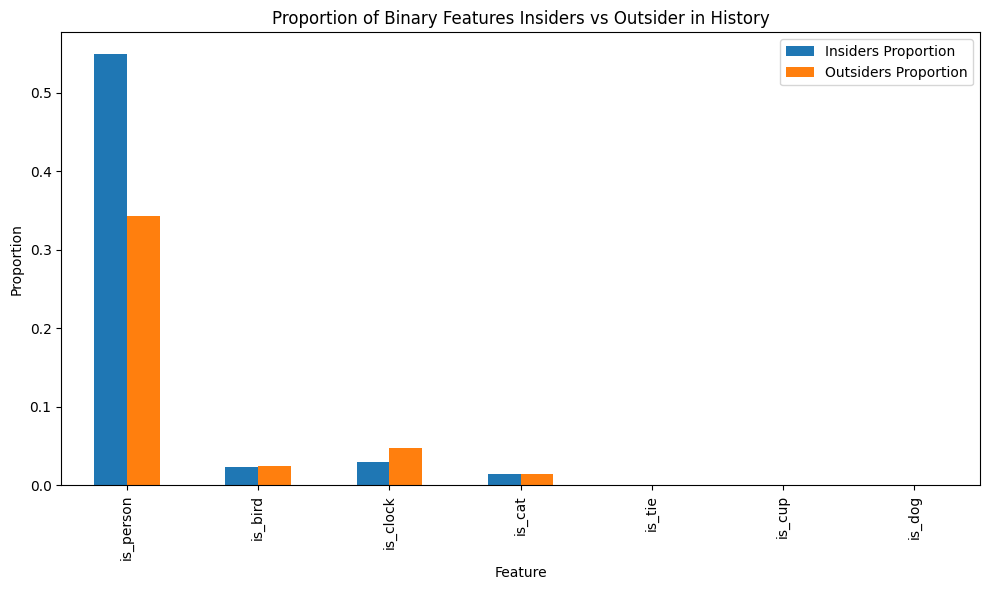

,Feature,Insiders Mean,Outsiders Mean,Insiders Std Dev,Outsiders Std Dev
0,num_objects,1.277355,1.029992,1.373533,1.431064


,Feature,Insiders Proportion,Outsiders Proportion
0,is_person,0.549724,0.342971
1,is_bird,0.022894,0.024593
2,is_clock,0.029323,0.046829
3,is_cat,0.014826,0.014088
4,is_tie,0.000000,0.000000
5,is_cup,0.000000,0.000000
6,is_dog,0.000000,0.000000


In [34]:
# Additional binary columns to analyze
binary_features = ['is_person', 'is_bird', 'is_clock', 'is_cat', 'is_tie', 'is_cup', 'is_dog']
all_features = ['num_objects'] + binary_features

# Split data into insiders and outsiders again
insiders = history[history['special_feature'] == 1]
outsiders = history[history['special_feature'] == 0]

# Insights for numerical feature
num_objects_stats = {
    "Feature": ["num_objects"],
    "Insiders Mean": [insiders['num_objects'].mean()],
    "Outsiders Mean": [outsiders['num_objects'].mean()],
    "Insiders Std Dev": [insiders['num_objects'].std()],
    "Outsiders Std Dev": [outsiders['num_objects'].std()],
}

# Proportions for binary features
binary_proportions = {
    "Feature": binary_features,
    "Insiders Proportion": [insiders[feature].mean() for feature in binary_features],
    "Outsiders Proportion": [outsiders[feature].mean() for feature in binary_features],
}

import pandas as pd

# Convert stats and proportions to DataFrames
num_objects_stats_df = pd.DataFrame(num_objects_stats)
binary_proportions_df = pd.DataFrame(binary_proportions)

# Visualize binary feature proportions
import matplotlib.pyplot as plt

binary_proportions_df.set_index("Feature").plot(
    kind="bar", figsize=(10, 6), title="Proportion of Binary Features Insiders vs Outsider in History"
)
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()

# Show the stats tables to the user
display(num_objects_stats_df)
display(binary_proportions_df)


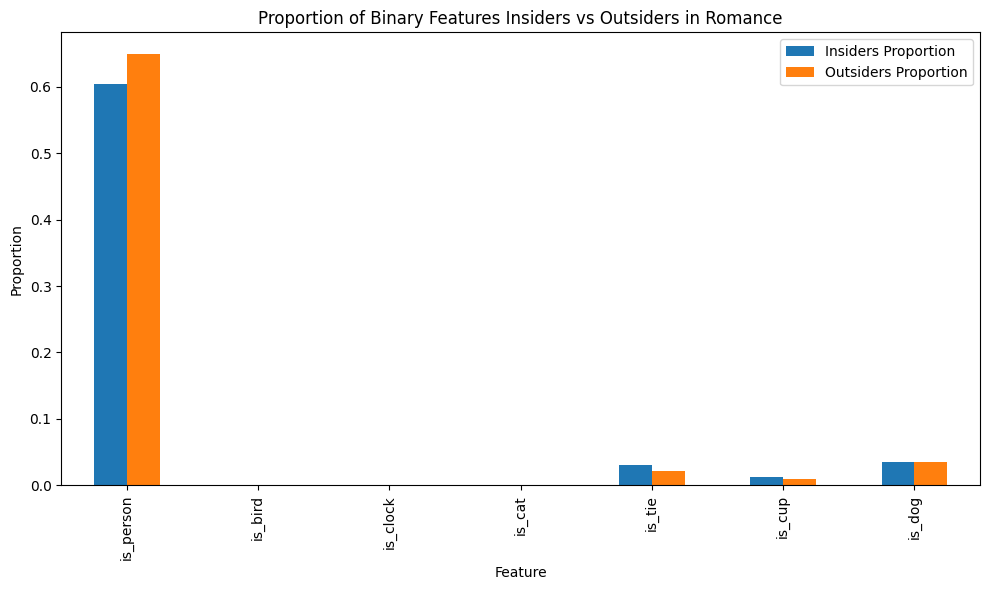

,Feature,Insiders Mean,Outsiders Mean,Insiders Std Dev,Outsiders Std Dev
0,num_objects,1.445487,1.415159,1.373316,1.280212


,Feature,Insiders Proportion,Outsiders Proportion
0,is_person,0.604332,0.649712
1,is_bird,0.000000,0.000000
2,is_clock,0.000000,0.000000
3,is_cat,0.000000,0.000000
4,is_tie,0.030144,0.020990
5,is_cup,0.012094,0.009950
6,is_dog,0.034477,0.034766


In [35]:
# Additional binary columns to analyze
binary_features = ['is_person', 'is_bird', 'is_clock', 'is_cat', 'is_tie', 'is_cup', 'is_dog']
all_features = ['num_objects'] + binary_features

# Split data into insiders and outsiders again
insiders = romance[romance['special_feature'] == 1]
outsiders = romance[romance['special_feature'] == 0]

# Insights for numerical feature
num_objects_stats = {
    "Feature": ["num_objects"],
    "Insiders Mean": [insiders['num_objects'].mean()],
    "Outsiders Mean": [outsiders['num_objects'].mean()],
    "Insiders Std Dev": [insiders['num_objects'].std()],
    "Outsiders Std Dev": [outsiders['num_objects'].std()],
}

# Proportions for binary features
binary_proportions = {
    "Feature": binary_features,
    "Insiders Proportion": [insiders[feature].mean() for feature in binary_features],
    "Outsiders Proportion": [outsiders[feature].mean() for feature in binary_features],
}

import pandas as pd

# Convert stats and proportions to DataFrames
num_objects_stats_df = pd.DataFrame(num_objects_stats)
binary_proportions_df = pd.DataFrame(binary_proportions)

# Visualize binary feature proportions
import matplotlib.pyplot as plt

binary_proportions_df.set_index("Feature").plot(
    kind="bar", figsize=(10, 6), title="Proportion of Binary Features Insiders vs Outsiders in Romance"
)
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()

# Show the stats tables to the user
display(num_objects_stats_df)
display(binary_proportions_df)
